In [1]:
import numpy as np

In [2]:
with open('../data/Korean_movie_reviews_2016.txt', encoding='utf-8') as f:
    docs = [doc.strip().split('\t') for doc in f]
    docs = [(doc[0], int(doc[1])) for doc in docs if len(doc) == 2]
    texts, labels = zip(*docs)

In [3]:
texts[0]

'부산 행 때문 너무 기대하고 봤'

## Word2vec 수행하기

In [4]:
docs_words = [ doc.strip().split() for doc in texts]

In [5]:
print(docs_words[:3])

[['부산', '행', '때문', '너무', '기대하고', '봤'], ['한국', '좀비', '영화', '어색하지', '않게', '만들어졌', '놀랍'], ['조금', '전', '보고', '왔', '지루하다', '언제', '끝나', '이', '생각', '드']]


In [6]:
from gensim.models import Word2Vec

In [7]:
w2v_model = Word2Vec(docs_words, window=3, min_count=3, vector_size=100)

In [8]:
w2v_model.wv['이정재']

array([-0.17425774,  0.39114186,  0.8411213 ,  0.5128034 , -0.804719  ,
       -0.6738966 , -0.04576032,  1.1918297 , -0.4421498 , -0.5544254 ,
        0.23687515, -0.62332237,  0.25659254, -0.7255727 , -0.12681687,
       -0.369649  ,  0.50376785, -0.8660768 , -0.04554209, -0.8544515 ,
        0.25398827,  0.1317111 ,  0.4168026 , -0.871763  , -0.73742896,
        1.1549649 , -0.92030805,  0.71297216,  0.6635021 ,  0.57414895,
       -0.09877977,  0.85241276, -0.4456329 ,  0.49015188,  0.28290188,
        0.4795173 ,  0.1550321 ,  0.56174153, -0.09157312, -0.09191702,
        1.0152638 , -0.05283633, -0.00328308,  0.062437  ,  0.3101593 ,
       -0.96910244, -0.52795225,  0.37310538,  0.72537947,  0.10971656,
       -0.7678936 ,  0.12244513,  0.11547878,  0.10824919, -0.85177684,
        0.36481208,  0.01327985,  0.10564998,  0.62110037, -0.27327332,
       -0.52227485, -0.2237148 ,  0.11049549, -0.02061436, -0.56099993,
        0.21293856, -0.98562664, -0.48728564, -0.64994913,  0.20

## 각 문서를 word vector를 이용해서 표현

각 문서는 20x100 의 형태로 표현되어야 함.

In [9]:
words_list = [doc.strip().split() for doc in texts]
# 각 문서를 단어들의 리스트 형태로 표현

In [10]:
total_words = []
for words in words_list:
    total_words.extend(words)

In [11]:
from collections import Counter
c = Counter(total_words)

In [12]:
max_features = 10000
common_words = [ word for word, count in c.most_common(max_features)]
# 빈도를 기준으로 상위 10000개의 단어들만 선택

In [13]:
words_dic ={}
# 각 단어에 대해서 index 생성하기
for index, word in enumerate(common_words):
    words_dic[word]=index+1
    # 각 단어의 index는 1부터 시작
    # 0은 패딩을 위해 사용하지 않음

In [14]:
id2word = {}
for word in words_dic:
    id2word[words_dic[word]]=word

In [15]:
len(id2word)

10000

In [16]:
id2word

{1: '영화',
 2: '너무',
 3: '봤',
 4: '좋',
 5: '진짜',
 6: '정말',
 7: '보고',
 8: '연기',
 9: '평점',
 10: '스토리',
 11: '배우',
 12: '이',
 13: '점',
 14: '보는',
 15: '감동',
 16: '했',
 17: '시간',
 18: '돈',
 19: '사람',
 20: '그냥',
 21: '본',
 22: '더',
 23: '입니',
 24: '였',
 25: '것',
 26: '이런',
 27: '봐',
 28: '재미',
 29: '하는',
 30: '최고',
 31: '아니',
 32: '내용',
 33: '재미없',
 34: '왜',
 35: '볼',
 36: '감독',
 37: '생각',
 38: '없는',
 39: '말',
 40: '알',
 41: '잘',
 42: '노잼',
 43: '아깝',
 44: '내',
 45: '처음',
 46: '최악',
 47: '할',
 48: '기대',
 49: '없고',
 50: '좀',
 51: '나',
 52: '좀비',
 53: '정도',
 54: '꼭',
 55: '거',
 56: '재밌게',
 57: '그',
 58: '있는',
 59: '알바',
 60: '모르',
 61: '수',
 62: '역시',
 63: '같은',
 64: '하나',
 65: '잼',
 66: '때',
 67: '보면',
 68: '뭐',
 69: '느낌',
 70: '별로',
 71: '완전',
 72: '임',
 73: '마지막',
 74: '재밌었',
 75: '장면',
 76: '개',
 77: '아이',
 78: '없다',
 79: '한',
 80: '들',
 81: '없',
 82: '분',
 83: '안',
 84: '와',
 85: '중간',
 86: '넘',
 87: '재밌어',
 88: '또',
 89: '보세',
 90: '끝',
 91: '이건',
 92: '보다',
 93: '다시',
 94: '걸',
 95: '듯'

In [17]:
# 각 문서를 상위 10000개 단어들에 대해서 index 번호로 표현하기
filtered_indexed_words = []
for review in words_list:
    indexed_words=[]
    for word in review:
        try:
            indexed_words.append(words_dic[word])
        except:
            pass
    filtered_indexed_words.append(indexed_words)

In [18]:
max_len = 20
# 각 영화평의 길이를 20으로 통일 

In [19]:
from tensorflow.keras.preprocessing import sequence
X = sequence.pad_sequences(filtered_indexed_words, maxlen=max_len)

In [20]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 204, 249, 121,   2, 345,   3])

0이면 모두 0으로 채움

In [21]:
zeros_vector = np.zeros(100,dtype="float32")

In [22]:
zeros_vector

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [23]:
X_vectors = []
for doc in X:
    doc_vectors = []
    for token_id in doc:
        if token_id == 0: 
            doc_vectors.append(zeros_vector)
        else:
            word = id2word[token_id]
            vector = w2v_model.wv[word]
            doc_vectors.append(vector)
    X_vectors.append(np.array(doc_vectors))

In [24]:
X_vectors = np.array(X_vectors)

In [25]:
X_vectors.shape

(165384, 20, 100)

In [26]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [27]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, LSTM, RepeatVector, TimeDistributed

In [28]:
input_shape = (20,100)

In [29]:
input_seq = Input(shape=input_shape)
x = LSTM(128, return_sequences=True)(input_seq)
lstm2 = LSTM(128, return_sequences=True)(x)
lstm3 = LSTM(64, return_sequences=True)(lstm2)
code = LSTM(64, return_sequences=False)(lstm3)
x = RepeatVector(max_len)(code)
x = LSTM(64, return_sequences=True)(x)
x = LSTM(128, return_sequences=True)(x)
x = LSTM(128, return_sequences=True)(x)
output = TimeDistributed(layers.Dense(100))(x)
autoencoder = Model(input_seq, output)

In [30]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20, 100)]         0         
                                                                 
 lstm (LSTM)                 (None, 20, 128)           117248    
                                                                 
 lstm_1 (LSTM)               (None, 20, 128)           131584    
                                                                 
 lstm_2 (LSTM)               (None, 20, 64)            49408     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 repeat_vector (RepeatVector  (None, 20, 64)           0         
 )                                                               
                                                             

In [31]:
from tensorflow.keras import optimizers

In [32]:
autoencoder.compile(optimizer=optimizers.Adam(0.001), loss='mse')

In [33]:
history = autoencoder.fit(X_vectors, X_vectors, epochs=10, batch_size=256, 
                         validation_split=0.1)

Epoch 1/10
582/582 [==============================] - 187s 309ms/step - loss: 0.2439 - val_loss: 0.2291
Epoch 2/10
582/582 [==============================] - 178s 306ms/step - loss: 0.2175 - val_loss: 0.2103
Epoch 3/10
582/582 [==============================] - 211s 363ms/step - loss: 0.2006 - val_loss: 0.1947
Epoch 4/10
582/582 [==============================] - 248s 426ms/step - loss: 0.1884 - val_loss: 0.1836
Epoch 5/10
582/582 [==============================] - 272s 467ms/step - loss: 0.1787 - val_loss: 0.1788
Epoch 6/10
582/582 [==============================] - 292s 502ms/step - loss: 0.1716 - val_loss: 0.1712
Epoch 7/10
582/582 [==============================] - 305s 524ms/step - loss: 0.1665 - val_loss: 0.1645
Epoch 8/10
582/582 [==============================] - 293s 503ms/step - loss: 0.1613 - val_loss: 0.1620
Epoch 9/10
582/582 [==============================] - 293s 504ms/step - loss: 0.1576 - val_loss: 0.1676
Epoch 10/10
582/582 [==============================] - 324s 558m

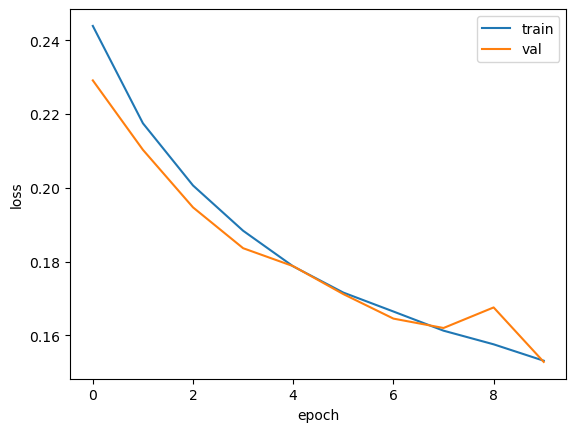

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 인코더 부분을 사용한 감성분석

In [35]:
# 인코더 모형 생성
encoder = Model(inputs=input_seq, outputs=code)

In [36]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_vectors, labels, test_size=0.1, random_state=0)

In [37]:
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)

517/517 [==============================] - 7s 14ms/step


In [38]:
X_train_encode.shape

(148845, 64)

In [39]:
model1 = models.Sequential()
model1.add(layers.Dense(64, activation = 'relu', input_shape=(X_train_encode.shape[1],)))
model1.add(layers.Dense(2, activation = 'softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________


In [40]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [41]:
model1.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001),
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [42]:
history = model1.fit(X_train_encode, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
931/931 [==============================] - 1s 1ms/step - loss: 0.6575 - accuracy: 0.6155 - val_loss: 0.6180 - val_accuracy: 0.6754
Epoch 2/10
931/931 [==============================] - 1s 978us/step - loss: 0.5642 - accuracy: 0.7430 - val_loss: 0.5196 - val_accuracy: 0.7809
Epoch 3/10
931/931 [==============================] - 1s 988us/step - loss: 0.4805 - accuracy: 0.7973 - val_loss: 0.4614 - val_accuracy: 0.8017
Epoch 4/10
931/931 [==============================] - 1s 971us/step - loss: 0.4401 - accuracy: 0.8088 - val_loss: 0.4390 - val_accuracy: 0.8041
Epoch 5/10
931/931 [==============================] - 1s 969us/step - loss: 0.4244 - accuracy: 0.8122 - val_loss: 0.4299 - val_accuracy: 0.8060
Epoch 6/10
931/931 [==============================] - 1s 974us/step - loss: 0.4176 - accuracy: 0.8141 - val_loss: 0.4252 - val_accuracy: 0.8088
Epoch 7/10
931/931 [==============================] - 1s 983us/step - loss: 0.4139 - accuracy: 0.8150 - val_loss: 0.4224 - val_accuracy: 0

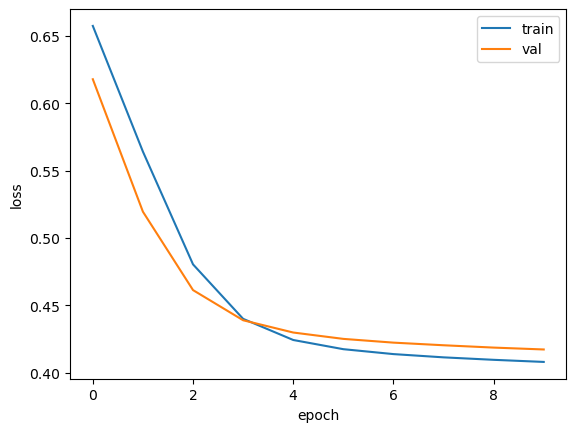

In [43]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [44]:
model1.evaluate(X_test_encode, y_test_one_hot)

517/517 [==============================] - 0s 667us/step - loss: 0.4027 - accuracy: 0.8221


[0.40265628695487976, 0.8221174478530884]